Brief:

Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).
Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.
After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.

In [7]:
import pandas as pd

Energy2018 = pd.read_csv('Hospital_Energy_Usage_2018.csv', sep=',')
Energy2019 = pd.read_csv('Hospital_Energy_Usage_2019.csv', sep=',')
Energy2020 = pd.read_csv('Hospital_Energy_Usage_2020.csv', sep=',')

print("Energy 2018")
print(Energy2018.describe())
print("Energy 2019")
print(Energy2019.describe())
print("Energy 2020")
print(Energy2020.describe())

Energy 2018
       TotalDailyEnergy_GWh       maxtp       mintp  ConfirmedCovidCases  \
count            365.000000  365.000000  365.000000                365.0   
mean              66.883795   14.383014    7.203288                  0.0   
std                5.448145    5.605985    4.690315                  0.0   
min               44.649000    0.000000   -5.000000                  0.0   
25%               61.928000   10.300000    3.600000                  0.0   
50%               68.523000   13.600000    7.200000                  0.0   
75%               70.454000   17.900000   11.000000                  0.0   
max               80.846000   32.000000   16.700000                  0.0   

       TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  
count                     365.0                 365.0             365.0  
mean                        0.0                   0.0               0.0  
std                         0.0                   0.0               0.0  
min    

In [38]:
Energy2018['datetime'] = pd.to_datetime(Energy2018['Date'])
Energy2019['datetime'] = pd.to_datetime(Energy2019['Date'])
Energy2020['datetime'] = pd.to_datetime(Energy2020['Date'])

In [99]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use("ggplot") # A nicer style to use for plots
plt.rcParams["figure.figsize"] = (20,8) #sets the plots size

#sns.set(style="darkgrid")
#fig, ax =plt.subplots(1,3)
#sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=Energy2018[1:], color='r', ax=ax[0])
#sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=Energy2019[1:], color='b',ax=ax[1])
#sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=Energy2020[1:], color='g',ax=ax[2])

#plt.show()

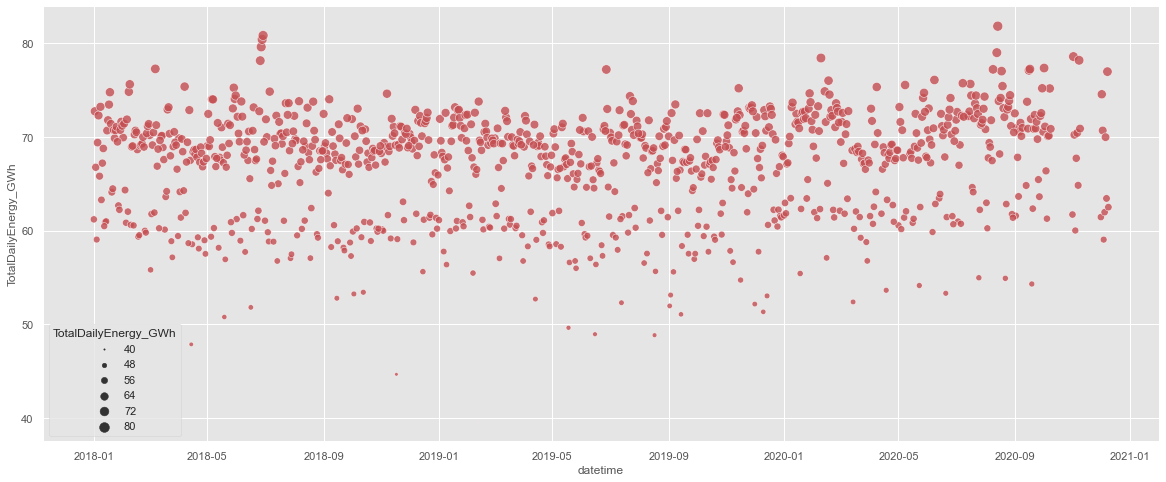

In [121]:
import numpy as np
import pandas as pd
import datetime

CombinedData = pd.concat([Energy2018, Energy2019, Energy2020])
CombinedData

sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=CombinedData[0:], color='r')

          Date  Total Daily Energy      MinTp  DailyCovidCases  \
0   2018-01-01           64.613238   6.931966              0.0   
1   2018-01-02           66.577245  11.574133              0.0   
2   2018-01-03           55.245489  14.090228              0.0   
3   2018-01-04           75.820228   6.165223              0.0   
4   2018-01-05           57.112898   1.700819              0.0   
..         ...                 ...        ...              ...   
360 2018-12-27           73.685533   7.642169              0.0   
361 2018-12-28           60.096896   3.734298              0.0   
362 2018-12-29           65.973035   2.767415              0.0   
363 2018-12-30           63.742335   5.853867              0.0   
364 2018-12-31           69.150342   7.344279              0.0   

     DailyCovidDeaths  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
360               0.0  
361            

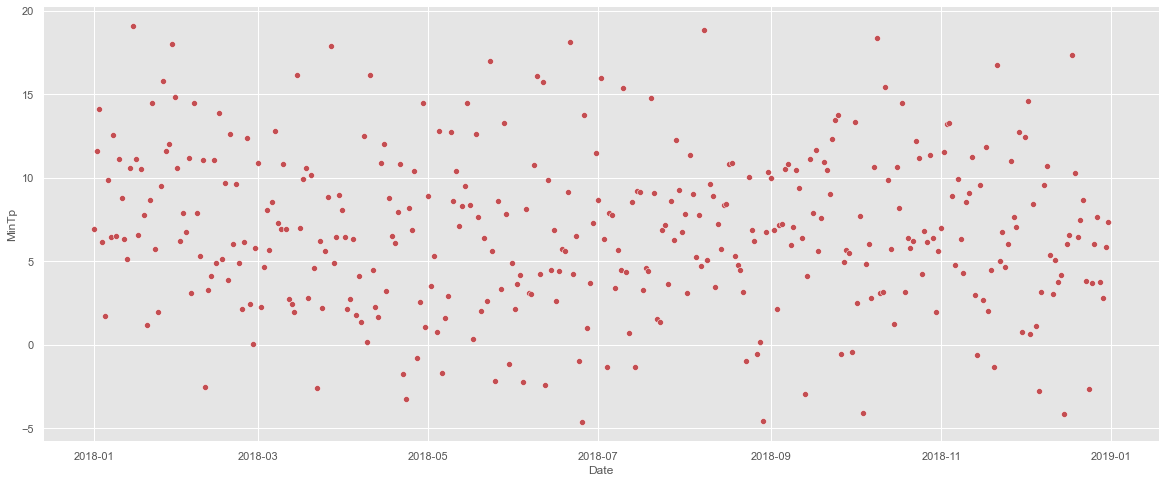

In [118]:
import numpy as np
import pandas as pd
import datetime

np.random.seed(2)

start2018 = datetime.datetime(2018, 1, 1)
end2018 = datetime.datetime(2018, 12, 31)
dates2018 = pd.date_range(start2018, end2018, freq='d')
#synEne2018 = np.random.poisson(lam=66.883795, size=365)
#synMintp2018 = np.random.poisson(lam= 7.203288, size=365)
synEne2018 = np.random.normal(loc=66.883795, scale=5.448145, size=365)
synMintp2018 = np.random.normal(loc=7.203288, scale=4.690315, size=365)
synCovidDailyCases2018 = np.random.normal(loc=0.0, scale=0.0, size=365)
synCovidDailyDeaths2018 = np.random.normal(loc=0.0, scale=0.0, size=365)
syn2018data = pd.DataFrame({'Date': dates2018, 'Total Daily Energy': synEne2018, 'MinTp': synMintp2018, 'DailyCovidCases': synCovidDailyCases2018, 'DailyCovidDeaths': synCovidDailyDeaths2018})
print(syn2018data)

fig, ax =plt.subplots()
sns.scatterplot(x="Date", y='MinTp', data=syn2018data[0:], color='r')

In [11]:
start2018 = pd.datetime(2018, 1, 1)
end2018 = pd.datetime(2018, 12, 31)
index2018 = pd.date_range(start2018, end2018, freq='d')
index2018


<ipython-input-11-c6425c15ace2>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start2018 = pd.datetime(2018, 1, 1)
<ipython-input-11-c6425c15ace2>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end2018 = pd.datetime(2018, 12, 31)


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')